# Determine Products is Recommended or Not Based on Review Texts from Reviewers

### Nama: Millata Tasyakhanifa
### Username: millatasyaa
### Email: millatatasyakhanifa@gmail.com

In [1]:
!nvidia-smi

Sat Sep  4 06:37:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    81W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Import Library

In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Read Dataset

In [3]:
df = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv", sep=',')

In [4]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


## Drop unnecessary features

In [6]:
df = df.drop(['Title', 'Clothing ID', 'Positive Feedback Count'], axis=1)
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses
2,2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants
4,4,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses


## Drop Missing Values

In [7]:
df.isnull().sum()

Unnamed: 0           0
Age                  0
Review Text        845
Rating               0
Recommended IND      0
Division Name       14
Department Name     14
Class Name          14
dtype: int64

In [8]:
df.dropna(axis=0, subset=['Review Text', 'Division Name', 'Department Name','Class Name'], inplace=True)

In [9]:
df.isnull().sum().sum()

0

## Do One Hot Encoding on Recommended IND column

In [10]:
rec_ind = pd.get_dummies(df['Recommended IND'])

In [11]:
new_df = pd.concat([df, rec_ind], axis=1)
new_df = new_df.drop(columns='Recommended IND')
new_df

,Unnamed: 0,Age,Review Text,Rating,Division Name,Department Name,Class Name,0,1
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates,0,1
1,1,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses,0,1
2,2,60,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses,1,0
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants,0,1
4,4,47,This shirt is very flattering to all due to th...,5,General,Tops,Blouses,0,1
...,...,...,...,...,...,...,...,...,...
23481,23481,34,I was very happy to snag this dress at such a ...,5,General Petite,Dresses,Dresses,0,1
23482,23482,48,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops,Knits,0,1
23483,23483,31,"This fit well, but the top was very see throug...",3,General Petite,Dresses,Dresses,1,0
23484,23484,28,I bought this dress for a wedding i have this ...,3,General,Dresses,Dresses,0,1


## Tokenization

In [12]:
tokenizer = Tokenizer(num_words= 5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)

In [13]:
tokenizer.fit_on_texts(df['Review Text'].values)

In [14]:
X = tokenizer.texts_to_sequences(df['Review Text'].values)

In [15]:
print(len(tokenizer.word_index))

14846


In [16]:
print(tokenizer.word_index)

{'x': 1208, 'the': 2, 'i': 3, 'and': 4, 'a': 5, 'it': 6, 'is': 7, 'this': 8, 'to': 9, 'in': 10, 'but': 11, 'on': 12, 'for': 13, 'of': 14, 'with': 15, 'was': 16, 'so': 17, 'my': 18, 'dress': 19, 'not': 20, 'that': 21, 'love': 22, 'size': 23, 'very': 24, 'have': 25, 'top': 26, 'fit': 27, 'are': 28, 'like': 29, 'be': 30, 'as': 31, 'me': 32, 'wear': 33, "it's": 34, 'great': 35, 'too': 36, "i'm": 37, 'or': 38, 'am': 39, 'just': 40, 'you': 41, 'would': 42, 'they': 43, 'up': 44, 'at': 45, 'fabric': 46, 'small': 47, 'color': 48, 'look': 49, 'if': 50, 'more': 51, 'really': 52, 'ordered': 53, 'little': 54, 'perfect': 55, 'will': 56, 'one': 57, 'these': 58, 'flattering': 59, 'well': 60, 'an': 61, 'soft': 62, 'out': 63, 'back': 64, 'because': 65, 'had': 66, 'can': 67, '\r': 68, 'comfortable': 69, 'cute': 70, 'nice': 71, 'than': 72, 'bought': 73, 'beautiful': 74, 'when': 75, 'all': 76, 'looks': 77, 'bit': 78, 'fits': 79, 'large': 80, 'shirt': 81, 'down': 82, 'which': 83, 'material': 84, 'much': 85,

In [17]:
X = pad_sequences(X)
print(X)

[[  0   0   0 ... 663   4  69]
 [  0   0   0 ...   7 773  96]
 [  0   0   0 ... 470   6 689]
 ...
 [  0   0   0 ...  25 167  35]
 [  0   0   0 ... 130 207 186]
 [  0   0   0 ...  36 434 206]]


In [18]:
X.shape

(22628, 116)

# Split Dataset

In [19]:
y = rec_ind

In [20]:
y.shape

(22628, 2)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape, y_train.shape)

(18102, 116) (18102, 2)


In [23]:
print(X_test.shape, y_test.shape)

(4526, 116) (4526, 2)


# Make Model

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(50000, 32, input_length=X.shape[1]),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(100, dropout=0.4),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])


In [32]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [43]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=100,
                    batch_size=64,
                    validation_split=0.2, # Validation set = 20% 
                    callbacks=[callbacks])

Epoch 1/100
227/227 [==============================] - 10s 32ms/step - loss: 0.4567 - accuracy: 0.8192 - val_loss: 0.3249 - val_accuracy: 0.8233
Epoch 2/100
227/227 [==============================] - 6s 26ms/step - loss: 0.3030 - accuracy: 0.8606 - val_loss: 0.2732 - val_accuracy: 0.8757
Epoch 3/100
227/227 [==============================] - 6s 25ms/step - loss: 0.2527 - accuracy: 0.8921 - val_loss: 0.2691 - val_accuracy: 0.8840
Epoch 4/100
227/227 [==============================] - 6s 25ms/step - loss: 0.2343 - accuracy: 0.9008 - val_loss: 0.2559 - val_accuracy: 0.8835

Akurasi telah mencapai >90%!


## Loss and Accuracy Plots During Training and Validation

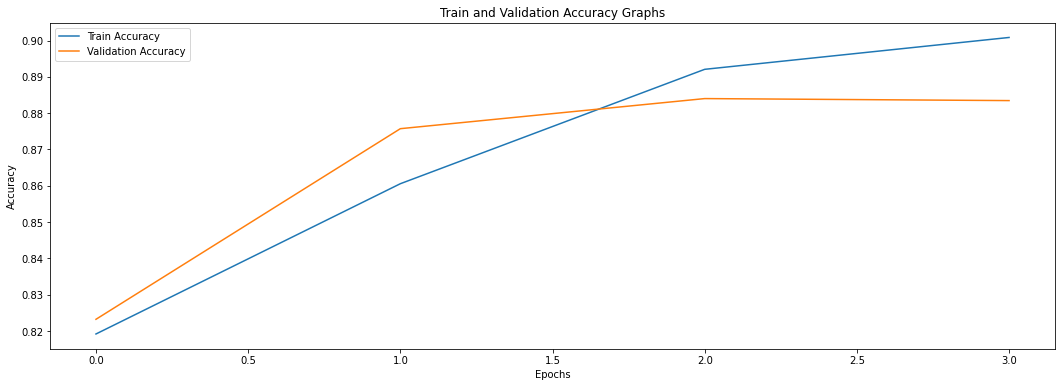

In [44]:
plt.figure(figsize=(18, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy Graphs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

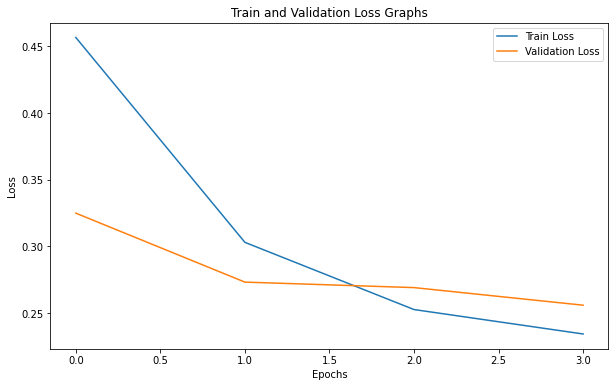

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss Graphs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()